## Implementation of SVM and KNN on Wine Quality Dataset

__importing python modules__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import mymodule
import Visualization
import warnings
warnings.filterwarnings("ignore")

dataset=pd.read_csv("../../datasets/winequality.csv")

__ We read the data from a csv in the line above this __

### Now we see the dimensions of data, just to get an idea of how huge the dataset is

In [2]:
dataset.shape

(4898, 13)

### we can also see more information about the data that has been read through Pandas

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.1 KB


In [4]:
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

We also Print the first few rows to see what the parameters are, here we can see that certain parameters are correlated, like the quality determines the value of recommend(which is pur target value here)

In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


### Splitting the data into features and target,
### Boolean values of recommend are the target, and the rest of the columns are features.
### There are redundant features here (Correlated, as quality determines recommend)
### Would appreciate help in understanding how to deal with correalated data.

In [6]:
data_X = dataset.drop('recommend',axis=1)
data_X = data_X.drop('quality', axis=1)
data_y = dataset['recommend']

data_X.shape

(4898, 11)

### Splitting data into test and train, I have tried accuracies for different fractions of test data, i.e. 0.2, 0.1, 0.15

In [7]:
data_X_train, data_X_test, data_y_train, data_y_test=mymodule.test_train_data(data_X, data_y)

(3918, 11) (980, 11) (3918,)


Creating the classifier, 
the inputs are my training data and that is used for predicting y values for test data
In-built function for an accuracy_score is used.
Linear Kernel, RBF Kernel, Signmoid Kernel

In [8]:
data_y_pred=mymodule.linear_classifier(data_X_train,data_X_test,data_y_train,data_y_test)

print("Classification Report: \n" + classification_report(data_y_test, data_y_pred, labels=None, target_names=None,
                                      sample_weight=None, digits=2, output_dict=False))
cnfmatrix=confusion_matrix(data_y_test, data_y_pred, labels=None, sample_weight=None)
print(cnfmatrix)

SVM - linear:
0.7979591836734694
Classification Report: 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       782
        True       0.00      0.00      0.00       198

    accuracy                           0.80       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.64      0.80      0.71       980

[[782   0]
 [198   0]]


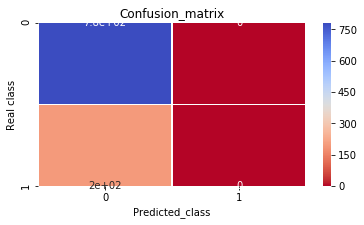

In [9]:
Visualization.plotxx(cnfmatrix)

In [10]:
data_y_pred=mymodule.rbf_classifier(data_X_train,data_X_test,data_y_train,data_y_test)

print("Classification Report: \n" +classification_report(data_y_test, data_y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
cnfmatrix=confusion_matrix(data_y_test, data_y_pred, labels=None, sample_weight=None)
print(cnfmatrix)

SVM - rbf:
0.8204081632653061
Classification Report: 
              precision    recall  f1-score   support

       False       0.84      0.95      0.89       782
        True       0.62      0.29      0.40       198

    accuracy                           0.82       980
   macro avg       0.73      0.62      0.65       980
weighted avg       0.80      0.82      0.79       980

[[746  36]
 [140  58]]


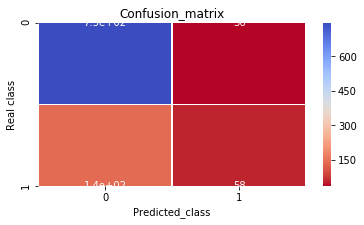

In [11]:
Visualization.plotxx(cnfmatrix)

In [12]:
data_y_pred=mymodule.sigmoid_classifier(data_X_train,data_X_test,data_y_train,data_y_test)

print("Classification Report: \n" +classification_report(data_y_test, data_y_pred, labels=None, target_names=None,
                                      sample_weight=None, digits=2, output_dict=False))
cnfmatrix=confusion_matrix(data_y_test, data_y_pred, labels=None, sample_weight=None)
print(cnfmatrix)

SVM - sigmoid:
0.7979591836734694
Classification Report: 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       782
        True       0.00      0.00      0.00       198

    accuracy                           0.80       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.64      0.80      0.71       980

[[782   0]
 [198   0]]


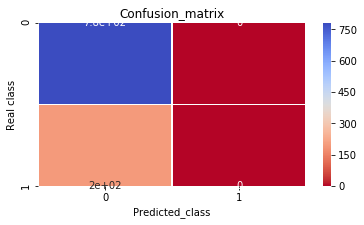

In [13]:
Visualization.plotxx(cnfmatrix)

In [14]:
data_y_pred=mymodule.knn_classifier(data_X_train,data_X_test,data_y_train,data_y_test)

print("Classification Report: \n" +classification_report(data_y_test, data_y_pred, labels=None, target_names=None,
                                      sample_weight=None, digits=2, output_dict=False))
cnfmatrix=confusion_matrix(data_y_test, data_y_pred, labels=None, sample_weight=None)
print(cnfmatrix)

Accuracy - KNN 
0.7948979591836735
Classification Report: 
              precision    recall  f1-score   support

       False       0.82      0.96      0.88       782
        True       0.48      0.16      0.24       198

    accuracy                           0.79       980
   macro avg       0.65      0.56      0.56       980
weighted avg       0.75      0.79      0.75       980

[[747  35]
 [166  32]]


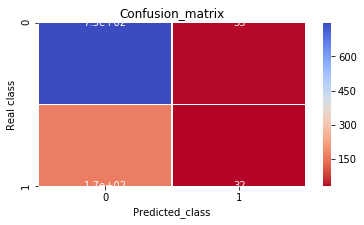

In [15]:
Visualization.plotxx(cnfmatrix)